In [1]:
import pandas as pd
import numpy as np

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as scipy
import statsmodels.stats.multitest as multi
 

%config Completer.use_jedi = False

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
sample_names = ['W1', 'W2', 'W3', 'W4', 'W5', 'W6', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6']
treatment = ['W', 'W', 'W','W', 'W', 'W','B', 'B', 'B', 'B','B', 'B']

In [3]:
slyc = pd.read_csv('/home/felix/thesis/chapter2_tomato_ISs/Results/1_Immuno_secretomes_of_tomatoes/FP_labelling/slyc_FP_labelling_data.csv', sep=',', index_col=0)
sper = pd.read_csv('/home/felix/thesis/chapter2_tomato_ISs/Results/1_Immuno_secretomes_of_tomatoes/FP_labelling/speru_PF_labelling_data.csv', sep=',', index_col=0)
spen = pd.read_csv('/home/felix/thesis/chapter2_tomato_ISs/Results/1_Immuno_secretomes_of_tomatoes/FP_labelling/spen_FP_labelling_data.csv', sep=',', index_col=0)

In [4]:
for df, species in zip([slyc, sper, spen], ['slyc', 'sper', 'spen']):
    df['name'] = sample_names
    df['treatment'] = treatment
    mock_mean = np.mean(df[df.treatment == 'W']['Area'].to_numpy())
    for i in df.index:
        df.loc[i, 'normalised_Area'] = df.loc[i, 'Area']/mock_mean
        
    df['species'] = species
    df.index = sample_names

In [5]:
fp = slyc.append([sper, spen], ignore_index=True)

In [6]:
fp.head()

,Area,name,treatment,normalised_Area,species
0,2621.648,W1,W,0.955183,slyc
1,2146.113,W2,W,0.781924,slyc
2,2711.648,W3,W,0.987974,slyc
3,2711.355,W4,W,0.987867,slyc
4,2779.941,W5,W,1.012856,slyc


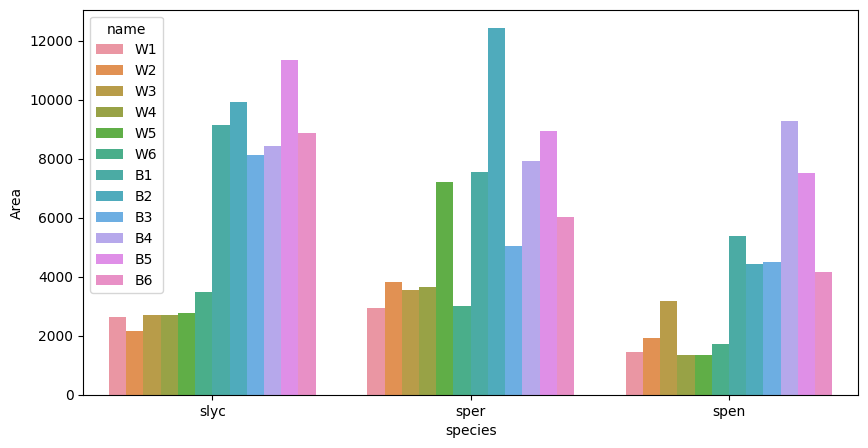

In [7]:
plt.figure(figsize=(10, 5))

sns.barplot(data=fp, x='species', hue='name', y='Area')

plt.show()

In [16]:
sl_m = fp[(fp.species == 'slyc') & (fp.treatment == 'W')].normalised_Area.to_numpy()
sl_b = fp[(fp.species == 'slyc') & (fp.treatment == 'B')].normalised_Area.to_numpy()

speru_m = fp[(fp.species == 'sper') & (fp.treatment == 'W')].normalised_Area.to_numpy()
speru_b = fp[(fp.species == 'sper') & (fp.treatment == 'B')].normalised_Area.to_numpy()

spen_m = fp[(fp.species == 'spen') & (fp.treatment == 'W')].normalised_Area.to_numpy()
spen_b = fp[(fp.species == 'spen') & (fp.treatment == 'B')].normalised_Area.to_numpy()

In [34]:
mock = [sl_m, speru_m, spen_m]
bion = [sl_b, speru_b, spen_b]
species = ['sl', 'speru', 'spen']

tests = []

for m, b, s in zip(mock, bion, species):
    t_v, p_v = scipy.ttest_ind(b, m, alternative='greater')
    tests.append(p_v)
    print("{}:\t{:.3f}\t{}".format(s, np.mean(b)/np.mean(m), p_v))
    
multi.fdrcorrection(tests)

sl:	3.391	7.682643182388549e-08
speru:	1.982	0.004802419907197064
spen:	3.223	0.0005258538784789446


(array([ True,  True,  True]),
 array([2.30479295e-07, 4.80241991e-03, 7.88780818e-04]))

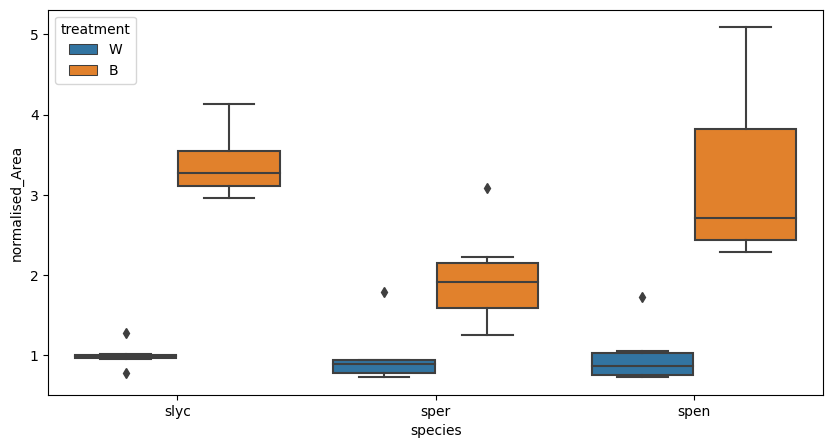

In [8]:
plt.figure(figsize=(10, 5))

sns.boxplot(data=fp, x='species', y='normalised_Area', hue='treatment')

plt.show()

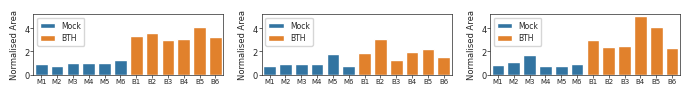

In [9]:
sns.set_style("ticks")

def annotate_axes(axes_list):
    for i, ax in enumerate(axes_list):
        ax.tick_params(axis='both', labelsize=8, pad=0.5)
        # change all spines
        for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(0.5)
        ax.xaxis.set_tick_params(width=0.5, length=2)
        ax.yaxis.set_tick_params(which='minor', width=0.25, length=2)
        ax.yaxis.set_tick_params(which='major', width=0.5, length=2)


figure = plt.figure(figsize=(7, 1))

slyc = plt.subplot2grid((1, 3), (0, 0))
sper = plt.subplot2grid((1, 3), (0, 1))
spen = plt.subplot2grid((1, 3), (0, 2))

axes = [slyc, sper, spen]
annotate_axes(axes)

### Define some arrays ###

sample_labels = ['M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6']

### Generate individual plots ###

# Slyc FP labelling

slyc.set_ylim(0, 5.25)
sns.barplot(data=fp[fp.species == 'slyc'], x='name', y='normalised_Area', hue='treatment', dodge=False, ax=slyc)

slyc.set_xlabel('')
slyc.set_ylabel('Normalised Area', fontsize=6)
slyc.tick_params(axis='y', labelsize=6)
slyc.set_xticklabels(sample_labels, size=5)

handles, labels = slyc.get_legend_handles_labels()
slyc.legend(handles[:2], ['Mock', 'BTH'], ncol=1, loc=2, prop={"size":5.5}, markerscale=0.5)


# Sper FP labelling

sper.set_ylim(0, 5.25)
sns.barplot(data=fp[fp.species == 'sper'], x='name', y='normalised_Area', hue='treatment', dodge=False, ax=sper)

sper.set_xlabel('')
sper.set_ylabel('Normalised Area', fontsize=6)
sper.tick_params(axis='y', labelsize=6)
sper.set_xticklabels(sample_labels, size=5)

handles, labels = sper.get_legend_handles_labels()
sper.legend(handles[:2], ['Mock', 'BTH'], ncol=1, loc=2, prop={"size":5.5}, markerscale=0.5)



# Spen FP labelling

spen.set_ylim(0, 5.25)
sns.barplot(data=fp[fp.species == 'spen'], x='name', y='normalised_Area', hue='treatment', dodge=False, ax=spen)

spen.set_xlabel('')
spen.set_ylabel('Normalised Area', fontsize=6)
spen.tick_params(axis='y', labelsize=6)
spen.set_xticklabels(sample_labels, size=5)

handles, labels = spen.get_legend_handles_labels()
spen.legend(handles[:2], ['Mock', 'BTH'], ncol=1, loc=2, prop={"size":5.5}, markerscale=0.5)


plt.tight_layout()
#plt.tight_layout(pad=0.75, h_pad=0.001)
#plt.savefig('/home/felix/thesis/chapter2_tomato_ISs/Results/1_Immuno_secretomes_of_tomatoes/Figure3_bar_charts_jupyter.svg', transparent=True)
plt.show()